<a href="https://colab.research.google.com/github/Noahbisht0/Machine-Learning-IBM-db2_sql/blob/main/AI16_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
np.random.seed(0)

In [ ]:
x,y = make_blobs(n_samples=5000,centers=[[4,4], [-2, -1], [2, -3], [1, 1]],cluster_std=0.9)

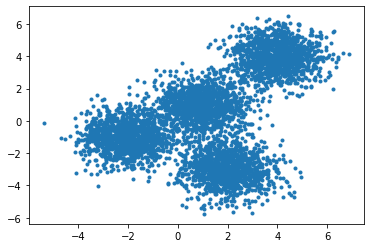

In [ ]:
plt.scatter(x[:,0],x[:,1],marker=".")

In [ ]:
k_means = KMeans(init = "k-means++",n_clusters=4,n_init=12)

In [ ]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

(1251,)
(1239,)
(1255,)
(1255,)


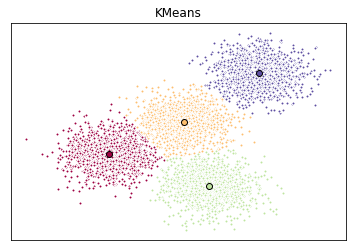

In [ ]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)
for k,col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])),colors):
  my_members = (k_means_labels == k)
  print(x[my_members,1].shape)
  cluster_center = k_means_cluster_centers[k]
  ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=col,marker=".")
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [ ]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2021-03-27 08:53:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2021-03-27 08:53:48 (1.46 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [ ]:
data = pd.read_csv("Cust_Segmentation.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df = data.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
X = df.values[:,1:]
X[0:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00, 0.000e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01, 2.000e+00],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01, 0.000e+00],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00, 0.000e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00, 1.000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
clust_dataset = StandardScaler().fit_transform(X)
clust_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  1.8799156 ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -0.5485468 ],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -0.5485468 ],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.5485468 ],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  1.8799156 ]])

In [ ]:
kmeans = KMeans(init="k-means++",n_clusters=3,n_init=12)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
df["Clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [ ]:
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


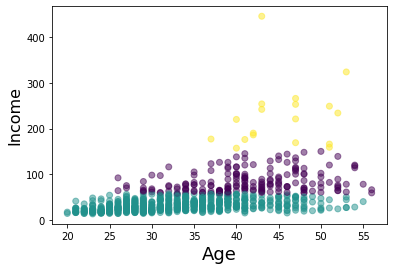

In [ ]:
plt.scatter(X[:,0],X[:,3],c=labels.astype(np.float),alpha=0.5)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)
plt.show()

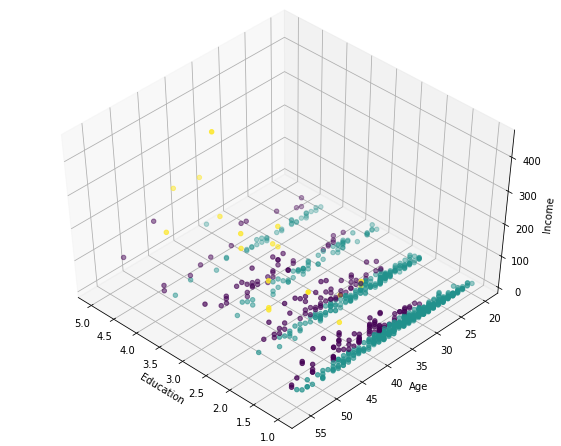

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:,1],X[:,0],X[:,3],c=labels.astype(np.float))